In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
df_customer = pd.read_csv('customer.csv', delimiter=';')
df_customer.head()

,CustomerID,Age,Gender,Marital_Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [38]:
df_product = pd.read_csv('product.csv', delimiter=';')
df_product.head()

,ProductID,Product_Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [39]:
df_store = pd.read_csv('store.csv', delimiter=';')
df_store.head()

,StoreID,Store_Name,Group_Store,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"


In [40]:
df_transaction = pd.read_csv('transaction.csv', delimiter=';')
df_transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,Total_Amount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


In [70]:
# Data Cleansing df_customer
df_customer['Income'] = df_customer['Income'].astype(str)
df_customer['Income'] = df_customer['Income'].str.replace(',', '.').astype(float)
df_customer.head()

,CustomerID,Age,Gender,Marital_Status,Income
0,1,55,1,Married,5.12
1,2,60,1,Married,6.23
2,3,32,1,Married,9.17
3,4,31,1,Married,4.87
4,5,58,1,Married,3.57


In [69]:
# Data Cleansing df_store
df_store['Latitude'] = df_store['Latitude'].astype(str)
df_store['Latitude'] = df_store['Latitude'].str.replace(',', '.').astype(float)
df_store['Longitude'] = df_store['Longitude'].astype(str)
df_store['Longitude'] = df_store['Longitude'].str.replace(',', '.').astype(float)
df_store.head()

,StoreID,Store_Name,Group_Store,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666
1,2,Prima Kelapa Dua,Prima,Modern Trade,-6.914864,107.608238
2,3,Prima Kota,Prima,Modern Trade,-7.797068,110.370529
3,4,Gita Ginara,Gita,General Trade,-6.966667,110.416664
4,5,Bonafid,Gita,General Trade,-7.250445,112.768845


In [68]:
# Data Cleansing df_transaction
df_transaction['Date'] = pd.to_datetime(df_transaction['Date'], format='%d/%m/%Y')
df_transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,Total_Amount,StoreID
0,TR11369,328,2022-01-01,P3,7500,4,30000,12
1,TR16356,165,2022-01-01,P9,10000,7,70000,1
2,TR1984,183,2022-01-01,P1,8800,4,35200,4
3,TR35256,160,2022-01-01,P1,8800,7,61600,4
4,TR41231,386,2022-01-01,P9,10000,1,10000,4


In [67]:
# Menggabungkan semua data
df_merge = pd.merge(df_transaction, df_customer, on='CustomerID')
df_merge = pd.merge(df_transaction, df_product.drop(columns=['Price']), on='ProductID')
df_merge = pd.merge(df_transaction, df_store, on='StoreID')
df_merge.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,Total_Amount,StoreID,Store_Name,Group_Store,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
1,TR76340,287,2022-01-01,P4,12000,4,48000,12,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
2,TR97336,233,2022-01-01,P7,9400,2,18800,12,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
3,TR26678,321,2022-02-01,P6,18000,3,54000,12,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
4,TR7826,181,2022-02-01,P1,8800,10,88000,12,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554


In [75]:
df_cluster = df_merge.groupby('CustomerID').agg(
    TransactionID=('TransactionID', 'count'),
    Qty=('Qty', 'sum'),
    Total_Amount=('Total_Amount', 'sum')
).reset_index()

df_cluster.head()

,CustomerID,TransactionID,Qty,Total_Amount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600


In [76]:
df_cluster

,CustomerID,TransactionID,Qty,Total_Amount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600
...,...,...,...,...
442,443,16,59,485100
443,444,18,62,577700
444,445,18,68,587200
445,446,11,42,423300


In [78]:
# Menghapus kolom 'CustomerID'
data_cluster = df_cluster.drop(columns=['CustomerID'])

# Melakukan normalisasi pada data_cluster (contoh menggunakan Min-Max Scaling)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_cluster_normalized = scaler.fit_transform(data_cluster)

print(data_cluster_normalized)

[[0.77777778 0.72463768 0.70394911]
 [0.55555556 0.68115942 0.39782666]
 [0.66666667 0.66666667 0.46925523]
 ...
 [0.83333333 0.84057971 0.6561092 ]
 [0.44444444 0.46376812 0.43890803]
 [0.55555556 0.46376812 0.46011132]]


In [83]:
# Mendefinisikan variabel model (sesuai dengan kebutuhan Anda)
model = {
    'labels': {
        'metric': 'euclidean'
    }
}

# Menghitung dan menyimpan nilai score berdasarkan data_cluster_normalized dan model.labels.metric
Score = []
for row in data_cluster_normalized:
    score = sum([x ** 2 for x in row]) ** 0.5 if model['labels']['metric'] == euclidean else None
    Score.append(score)


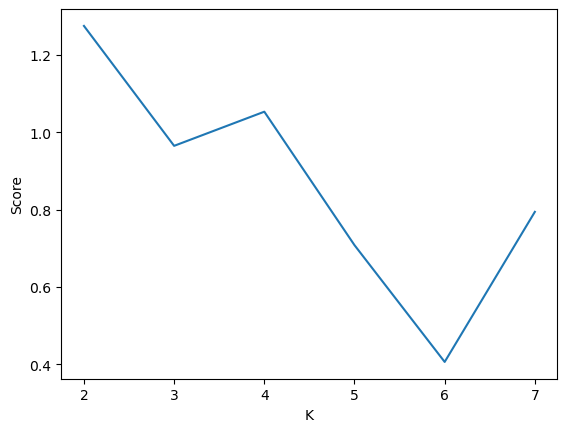

In [89]:
# Lakukan penyesuaian data jika panjangnya tidak sama
min_length = min(len(K), len(Score))
K = K[:min_length]
Score = Score[:min_length]

# Pastikan panjang K dan Score sama setelah penyesuaian
assert len(K) == len(Score), "Panjang K dan Score harus sama"

# Visualisasi dengan line plot menggunakan Seaborn
sns.lineplot(x=K, y=Score)

# Tambahkan label pada sumbu x dan y
plt.xlabel('K')
plt.ylabel('Score')

# Tampilkan plot
plt.show()


In [112]:
df_cluster['cluster_label'] = fit.labels_

In [109]:
df_cluster.groupby('cluster_label').agg({
    'CustomerID': 'count',
    'TransactionID': 'mean',
    'Qty': 'mean',
    'Total_Amount': 'mean'
})


,CustomerID,TransactionID,Qty,Total_Amount
cluster_label,,,,
0,188,14.143617,52.638298,474143.085106
1,259,9.115830,32.432432,281483.011583
